# SVD Tutorial: Disney Themed Image Compression
In this tutorial, we'll explore a fascinating topic, Singular Value Decomposition (SVD), and apply it to compress an image. But to make it more exciting, let's use a Disney-themed image.

## Part 1: Understanding SVD
SVD, or Singular Value Decomposition, is a method in linear algebra that decomposes a matrix into three other matrices. SVD can be used in many fields, including data science, machine learning, and image processing. When applied to images, SVD can help compress the image without significant loss of quality.

## Part 2: Required Libraries and Modules
Before we start, make sure you have installed the following Python libraries:

- NumPy
- matplotlib
- Pillow
You can install them using pip:

## Part 3: Loading and Visualizing the Disney-Themed Image
Let's start by loading and visualizing our Disney-themed image.

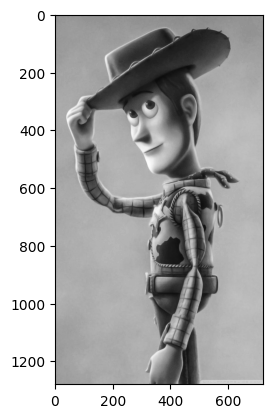

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

# Load the image
img = Image.open("data/disney/disney.jpg")

# Convert the image to grayscale
img_gray = img.convert("L")

# Display the image
plt.imshow(img_gray, cmap="gray")
plt.show()

## Part 4: Applying SVD for Image Compression
Let's dive into the main part of our tutorial. First, we need to convert the image data to a NumPy array.

In [2]:
# Convert the image to numpy array
img_array = np.array(img_gray)

Next, we apply the SVD. NumPy provides us with a handy function `np.linalg.svd()` for this.

In [3]:
# Apply SVD
U, S, V = np.linalg.svd(img_array)

Here, U, S, and V are the matrices that result from the SVD. U and V are orthogonal matrices, while S is a diagonal matrix that contains the singular values of img_array. These singular values are crucial as they tell us how much information each corresponding dimension in the image carries.

## Part 5: Image Compression
For the compression, we keep the largest singular values in S and reduce the others. This approach keeps the most crucial information (the large singular values) while discarding the less important ones (the small singular values).

Let's keep the top 10 singular values.

In [4]:
# Number of singular values to keep
k = 10

# Create a new S matrix with only top k singular values
S_k = np.zeros((U.shape[0], V.shape[0]))
S_k[:k, :k] = np.diag(S[:k])

# Reconstruct the compressed image
img_compressed = U @ S_k @ V

The operation U @ S_k @ V is a matrix multiplication that reconstructs the original matrix, but with the reduced information, thus creating the compressed image.

## Part 6: Visualizing the Compressed Image
Now let's visualize the compressed Disney-themed image.

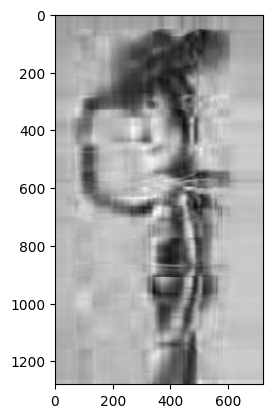

In [5]:
# Display the compressed image
plt.imshow(img_compressed, cmap="gray")
plt.show()

And that's it! You have just compressed a Disney-themed image using SVD. The resulting image should be recognizable but with fewer details.

This approach works well for compressing images, but keep in mind that the more you compress, the more information you lose. It's all about finding a balance between the level of compression and the preserved quality.

You can experiment by changing the value of k to see how the compression level affects the image quality. Enjoy exploring the magic of Disney through the lens of linear algebra!

When you perform Singular Value Decomposition (SVD) for image compression, you're not physically changing the file size of the image on disk (like you might see with traditional file compression), but rather you're reducing the amount of information needed to represent the image.

To measure how much information you have reduced, you can look at the number of singular values you have kept in comparison to the original number of singular values.

Let's illustrate this in code:

In [6]:
# Original number of singular values
num_singular_values_original = len(S)

# Number of singular values kept
num_singular_values_kept = k

# Calculate compression ratio
compression_ratio = num_singular_values_kept / num_singular_values_original

print("Compression Ratio: ", compression_ratio)

Compression Ratio:  0.013888888888888888


In this code, the compression_ratio is a measure of how much information you've kept from the original image. If the ratio is 1, you've kept all the information (no compression). If it's 0.5, you've kept half of the information, so you could think of this as "50% compression".

But remember, this does not mean the file size has been reduced by 50%. It simply means you're only using half of the original singular values to represent the image.

If you want to save the compressed image and compare the actual file size, you need to save the image using the image library:

In [7]:
# Saving the compressed image
img_compressed = Image.fromarray(img_compressed).convert("L")
img_compressed.save("data/disney/compressed_disney.jpg")

Then, you can compare the file sizes of "disney.jpg" and "compressed_disney.jpg" using your operating system's file explorer or terminal. Note that this size reduction might not be as significant because the .jpg file format itself already applies some form of compression. You will likely notice a more significant size reduction if you start with a .bmp or .png file format.

This approach offers a trade-off between file size and image quality. The less information you keep (lower k), the lower the image quality but the smaller the file size, and vice versa.

In [ ]:
def plot_svd(image, vmin, vmax, nrows, ncols):
    n = min(image.shape)
    plt.imshow(image, cmap="gray", vmin=vmin, vmax=vmax)
    plt.title("Original Image")
    plt.show()
    U, S, V = np.linalg.svd(image)

    imgs = []
    for i in range(n):
        imgs.append(S[i] * np.outer(U[:, i], V[i]))

    combined_imgs = []
    for i in range(n):
        img = sum(imgs[: i + 1])
        combined_imgs.append(img)

    fig, axes = plt.subplots(
        figsize=(n, n), nrows=nrows, ncols=ncols, sharex=True, sharey=True
    )
    for num, ax in zip(range(n), axes.flatten()):
        if num < len(imgs):
            ax.imshow(imgs[num], cmap="gray", vmin=vmin, vmax=vmax)
            ax.set_title(str(num) + " : " + str(np.round(S[num], 2)))
    plt.show()

    fig, axes = plt.subplots(
        figsize=(n, n), nrows=nrows, ncols=ncols, sharex=True, sharey=True
    )
    for num, ax in zip(range(n), axes.flatten()):
        if num < len(combined_imgs):
            ax.imshow(combined_imgs[num], cmap="gray", vmin=vmin, vmax=vmax)
            ax.set_title(str(num))
    plt.show()

    return U, S, V

In [ ]:
D = np.array(
    [
        [0, 1, 1, 0, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
    ]
)

U, S, V = plot_svd(D, 0, 1, 1, 5)

In [ ]:
vmin = 1
vmax = 255
image_bias = 1  # sometimes 1

# Load the image
img = Image.open("data/disney/disney.jpg")

# Convert the image to grayscale and resize
img_gray = img.convert("L").resize((100, 100))

# Convert the image to numpy array
A = np.array(img_gray)

plot_svd(A, vmin, vmax, 10, 10)